In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers import LSTM
from keras import optimizers
from sklearn.metrics import r2_score 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

2023-02-25 07:45:40.031711: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('/Volumes/GoogleDrive/My Drive/ML for Climate Modelling/Datasets/Observational_RECO_Extracted_from_Dry_sites/US-SRG_observation.csv', engine='python')

In [3]:
##Check whether the dataset is the right one. Curently are commented out, feel free to use them if needed
#df_sub_test = dataframe1[dataframe1["Year"] == 2009]
#plt.rcParams['figure.figsize'] = [20, 10]
#df_sub_test.plot(x="Time", y="Net_Ecosystem_Exchange", kind = "scatter")

In [4]:
##extracting columns'Net_Ecosystem_Exchange', 'Soil_Temperature', 'Daily_EF', 'Air_Temperature', 'Precipitation'
##df_target is Ecosystem Respiration
##df_feature are features used to predict df_target
df_target = df[['Net_Ecosystem_Exchange']].astype(float)
df_features = df[['Soil_Temperature', 'Daily_EF', 'Precipitation']].astype(float)
scaler = StandardScaler()
df_target = scaler.fit_transform(df_target) ##scale the data to (mean = 0 , SD = 1)
df_features = scaler.fit_transform(df_features) 

In [5]:
lookback=150
X = []
for i in range(lookback,len(df_features)):
  X.append(df_features[i - lookback:i])
X = np.array(X)
Y = df_target[lookback:len(df_target)]

In [6]:
##Will train the data on all year except for the latest year: 2014
test_year = 2014
df_test = df[df["Year"] == test_year]
count = len(df_test)
##create training and testing dataset
trainX, testX = X[0:len(X)-count],X[len(X)-count:]
trainY,testY = Y[0:len(X)-count],Y[len(X)-count:]

trainX = np.reshape(trainX, (len(trainX), 150,len(trainX[0][1])))
testX = np.reshape(testX, (len(testX), 150,len(testX[0][1])))
trainY = np.array(trainY)


In [16]:
# design network for LSTM
#model = Sequential()
#model.add(LSTM(32, input_shape=(trainX.shape[1], trainX.shape[2])))
#model.add(LSTM(32, input_shape=(trainX.shape[1], trainX.shape[2])))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
##ANN
ann = tf.keras.models.Sequential()
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=250,activation="relu"))
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="mean_squared_error")
ann.fit(trainX,trainY,batch_size=1,epochs = 10, validation_data=(testX, testY), verbose=1, shuffle=False)
# fit network
#history = model.fit(trainX, trainY, epochs=10, batch_size=1, validation_data=(testX, testY), verbose=1, shuffle=False)


Epoch 1/10
24051/24051 [==============================] - 45s 2ms/step - loss: 0.7595 - val_loss: 0.9415
Epoch 2/10
24051/24051 [==============================] - 48s 2ms/step - loss: 0.7884 - val_loss: 0.9572
Epoch 3/10
24051/24051 [==============================] - 42s 2ms/step - loss: 0.7939 - val_loss: 0.9841
Epoch 4/10
24051/24051 [==============================] - 45s 2ms/step - loss: 0.8066 - val_loss: 0.9928
Epoch 5/10
24051/24051 [==============================] - 50s 2ms/step - loss: 0.8812 - val_loss: 0.9336
Epoch 6/10
24051/24051 [==============================] - 40s 2ms/step - loss: 0.9722 - val_loss: 0.9605
Epoch 7/10
24051/24051 [==============================] - 41s 2ms/step - loss: 0.9386 - val_loss: 0.9336
Epoch 8/10
24051/24051 [==============================] - 36s 1ms/step - loss: 0.8887 - val_loss: 0.9641
Epoch 9/10
24051/24051 [==============================] - 6218s 259ms/step - loss: 0.8390 - val_loss: 0.9985
Epoch 10/10
24051/24051 [==========================

125/125 [==============================] - 0s 2ms/step


ValueError: x and y can be no greater than 2D, but have shapes (3997,) and (3997, 150, 1)

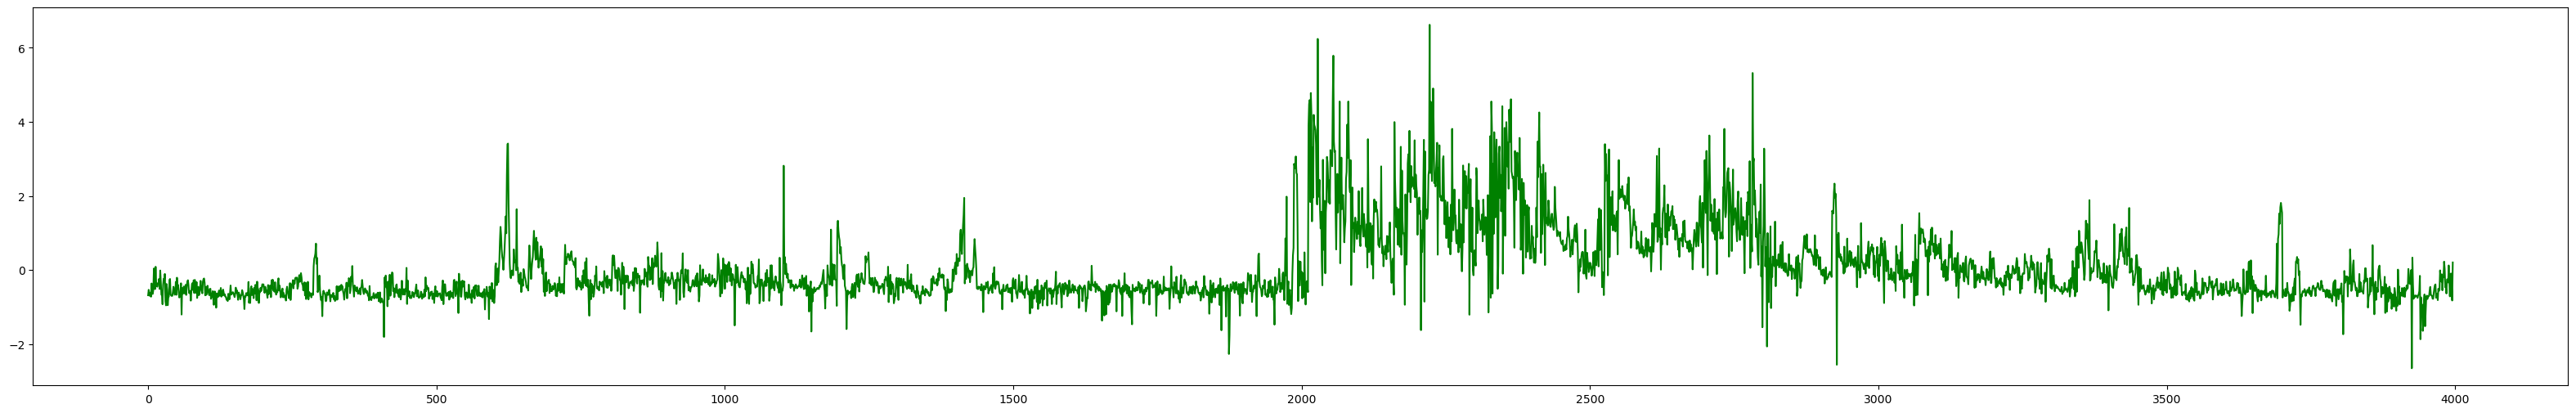

In [14]:
# plot history
yhat = ann.predict(testX)
plt.figure(figsize=(40,6))
plt.plot(testY,'g-')
plt.plot(yhat,'b--')
plt.legend(('Real values', 'Predicted values'),loc='upper left')
plt.show()

In [15]:
yhat.shape

(3997, 150, 1)